In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("new_upper_down.csv")
df.head()

,AnalogValue,Density,Amplitude,Result
0,881,887,1.08,0
1,909,903,1.11,0
2,889,890,1.09,0
3,898,903,1.10,0
4,901,898,1.10,0


In [10]:
upper = df.iloc[:500, :]
down = df.iloc[2000:2500, :]

In [46]:
upper.head()

,AnalogValue,Density,Amplitude,Result
0,881,887,1.08,0
1,909,903,1.11,0
2,889,890,1.09,0
3,898,903,1.10,0
4,901,898,1.10,0


In [13]:
down = down.reset_index(drop = True)

In [14]:
down.head()

,AnalogValue,Density,Amplitude,Result
0,1108,1107,1.35,1
1,1104,1104,1.35,1
2,1095,1094,1.34,1
3,1081,1078,1.32,1
4,1077,1072,1.32,1


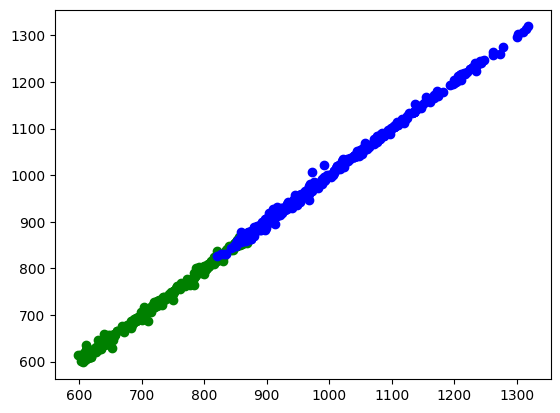

In [19]:
import matplotlib.pyplot as plt

plt.scatter(upper["AnalogValue"], upper["Density"] ,color = "green" )
plt.scatter(down["AnalogValue"], down["Density"] ,color = "blue" )



In [20]:
data = pd.concat([upper, down])
data = data.reset_index(drop = True)
data.tail()

,AnalogValue,Density,Amplitude,Result
995,1043,1042,1.27,1
996,1017,1015,1.24,1
997,1018,1013,1.24,1
998,1008,1008,1.23,1
999,1008,1009,1.23,1


In [21]:
data.head()

,AnalogValue,Density,Amplitude,Result
0,881,887,1.08,0
1,909,903,1.11,0
2,889,890,1.09,0
3,898,903,1.10,0
4,901,898,1.10,0


In [22]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [23]:
X.head()

,AnalogValue,Density,Amplitude
0,881,887,1.08
1,909,903,1.11
2,889,890,1.09
3,898,903,1.10
4,901,898,1.10


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X = scaler.fit_transform(X)

# The scaled_data variable now contains the scaled values


In [26]:
X

array([[0.3933518 , 0.40083218, 0.39772727],
       [0.43213296, 0.42302358, 0.43181818],
       [0.40443213, 0.40499307, 0.40909091],
       ...,
       [0.58310249, 0.57558946, 0.57954545],
       [0.56925208, 0.56865465, 0.56818182],
       [0.56925208, 0.57004161, 0.56818182]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(800, 3)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))


IndexError: tuple index out of range

In [31]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))

# model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 32)             128       
                                                                 
 lstm (LSTM)                 (None, 1, 64)             24832     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 dense (Dense)               (None, 1, 128)            8320      
                                                                 
 dense_1 (Dense)             (None, 1, 64)            

In [33]:
from tensorflow.keras.callbacks import Callback

class AccuracyStopCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.95:
            print("\nReached 95% accuracy, stopping training!")
            self.model.stop_training = True

# Create an instance of the callback
accuracy_stop_callback = AccuracyStopCallback()

# Pass the callback to the callbacks parameter when fitting the model
model.fit(X_train, y_train, callbacks=[accuracy_stop_callback], epochs = 100)


Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1420 - accuracy: 0.9325
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.1516 - accuracy: 0.9275
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1407 - accuracy: 0.9375
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1524 - accuracy: 0.9300
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1600 - accuracy: 0.9275
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1454 - accuracy: 0.9300
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1480 - accuracy: 0.9325
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1552 - accuracy: 0.9312
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1572 - accuracy: 0.9350
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1462 - accuracy: 0.9312
Epoch 11/

25/25 [==============================] - 0s 6ms/step - loss: 0.1444 - accuracy: 0.9312
Epoch 84/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1408 - accuracy: 0.9388
Epoch 85/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1398 - accuracy: 0.9438
Epoch 86/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1428 - accuracy: 0.9312
Epoch 87/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1466 - accuracy: 0.9400
Epoch 88/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1490 - accuracy: 0.9300
Epoch 89/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1397 - accuracy: 0.9413
Epoch 90/100
25/25 [==============================] - 0s 7ms/step - loss: 0.1439 - accuracy: 0.9350
Epoch 91/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1425 - accuracy: 0.9375
Epoch 92/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1434 - accuracy: 0.9350
Epoch 93/100


In [34]:
# Save the model
model.save("model_upper_down.h5")


In [43]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [44]:
for pred in predictions:
    predicted_class = 1 if pred[0][0] > 0.5 else 0
    print("Predicted class:", predicted_class)



Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted cl

In [37]:
# Assuming you have your test data and labels as X_test and y_test respectively

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)


7/7 [==============================] - 2s 5ms/step - loss: 0.1245 - accuracy: 0.9450
Accuracy: 0.9449999928474426


In [45]:
# Assuming predictions and y_test are in the correct format
for pred, true_label in zip(predictions, y_test):
    predicted_class = 1 if pred[0][0] > 0.5 else 0
    print("Predicted class:", predicted_class)
    print("True label:", true_label)
    print("Matched:", predicted_class == true_label)
    print()


Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 1
Matched: False

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 0
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 0
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 0
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 0
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 0
Matched: True

Predicted class: 1
True label: 1
Matche

In [76]:
upper_new = pd.read_csv("upper.csv")
# upper_new= upper_new.iloc[500:1000, :]
upper_new.drop('Unnamed: 0', axis=1, inplace=True)

upper_new.head()

,AnalogValue,Density,Amplitude,Result
0,587,579,0.72,0
1,589,592,0.72,0
2,605,603,0.74,0
3,624,627,0.76,0
4,622,622,0.76,0


In [78]:
down_new = pd.read_csv("down.csv")
down_new.drop('Unnamed: 0', axis=1, inplace=True)
down_new.head()

,AnalogValue,Density,Amplitude,Result
0,1097,1093,1.34,1
1,1117,1120,1.36,1
2,1136,1136,1.39,1
3,1118,1117,1.37,1
4,1102,1095,1.35,1


In [79]:
df = pd.concat([upper_new, down_new])
df = df.reset_index(drop = True)
df.tail()

,AnalogValue,Density,Amplitude,Result
195,820,807,1.00,1
196,796,795,0.97,1
197,779,779,0.95,1
198,768,774,0.94,1
199,756,755,0.92,1


In [57]:
upper_new = upper_new.reset_index(drop = True)

upper_new["Result"] = 0


In [80]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head()

,AnalogValue,Density,Amplitude
0,587,579,0.72
1,589,592,0.72
2,605,603,0.74
3,624,627,0.76
4,622,622,0.76


In [81]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int64

In [82]:
from tensorflow.keras.models import load_model
model_path = "E:/DATA_SET/allnew_upperdown.h5"
model = load_model(model_path)


In [83]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X = scaler.fit_transform(X)

# The scaled_data variable now contains the scaled values


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))


IndexError: tuple index out of range

In [86]:
X_train.shape

(160, 3, 1)

In [87]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the pre-trained model

# Freeze the base model layers
for layer in model.layers:
    layer.trainable = False

# Add new layers on top of the pre-trained model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
model.fit(X_train, y_train, batch_size=32, epochs=10)

# Optional: Fine-tuning
# Unfreeze some top layers of the base model
for layer in model.layers[-3:]:
    layer.trainable = True

# Lower the learning rate for fine-tuning
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training the entire model
model.fit(X_train, y_train, batch_size=32, epochs=10)

# Evaluate the model



Epoch 1/10
5/5 [==============================] - 13s 6ms/step - loss: 0.6937 - accuracy: 0.4938
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.4938
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.4938
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4938
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4938
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.4938
Epoch 7/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.4688
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5063


Epoch 1/10
5/5 [==============================] - 11s 7ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 7/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 10/10
5/5 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.5063


In [71]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

4/4 [==============================] - 3s 6ms/step - loss: 0.0033 - accuracy: 1.0000
Test loss: 0.003334040753543377
Test accuracy: 1.0


In [72]:
# Save the model
model.save('E:/DATA_SET/allnew_upperdown.h5')
